# HW8
## Author: Fiona Fan

In [54]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as hr
import scipy.spatial.distance as dis


%matplotlib inline


## Problem 1 (1)

In [46]:
df = pd.read_csv('College.csv')
df.Private = pd.get_dummies(df.Private)
X = pd.DataFrame(scale(df),  columns=df.columns)
# X.Private

In [103]:
pca = PCA().fit(df)
column_names = [f'V{i}' for i in range(1, len(df.columns)+1)]
pca_loadings = pd.DataFrame(pca.components_.T, index=df.columns, columns=column_names)
numV=len(df.columns)

# pca_loadsing
# print(np.array(temp.V2))
pca_loadings['dist'] = abs(np.array(pca_loadings.V2)/ np.array(pca_loadings.V1))
a = pca_loadings.sort_values(by=['dist'])
#sorted by correlation with x axis
a


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,dist
Apps,0.557026,-0.039361,-0.167353,0.664271,0.164687,0.058050,1.343426e-01,0.411794,-0.027407,-0.003760,0.004389,-0.003022,-0.000531,0.000401,0.000589,0.001128,-0.000187,3.369198e-05,0.070662
Accept,0.347712,-0.077162,-0.162363,0.232927,0.005806,0.060281,-2.399573e-01,-0.841807,0.149990,0.005824,-0.008233,0.005367,0.001760,0.001075,-0.001251,-0.002473,0.000233,-4.257937e-05,0.221914
Enroll,0.129854,-0.045413,-0.009663,-0.058832,-0.064077,0.021307,-4.089118e-02,-0.118368,-0.978310,-0.007720,0.007086,-0.006926,0.001317,-0.003497,0.002619,0.003102,0.000062,1.062978e-05,0.349722
Books,0.003734,0.001429,0.002740,-0.000882,0.006591,-0.021247,4.972845e-02,-0.009805,-0.009178,0.998364,0.002387,-0.004619,-0.006341,0.001228,-0.004781,0.002347,-0.000348,-6.057803e-05,0.382694
F.Undergrad,0.670614,-0.283672,0.024672,-0.584959,-0.281437,-0.085317,1.332175e-02,0.148604,0.135160,-0.000612,0.001956,0.001117,-0.000713,0.000346,-0.000352,-0.000159,-0.000174,2.915661e-05,0.423003
P.Undergrad,0.111113,-0.080380,0.066142,-0.302818,0.923535,0.146195,-1.026036e-01,-0.000183,-0.017002,0.001231,-0.002052,0.002486,-0.000572,-0.000020,-0.000068,-0.000338,0.000011,9.338211e-06,0.723405
PhD,0.001139,0.000873,-0.000628,-0.001064,0.000215,-0.000739,-3.391354e-04,0.000643,0.000235,-0.006068,-0.450245,-0.571218,-0.168315,-0.077123,-0.599396,0.275942,-0.035117,4.049226e-03,0.766333
Terminal,0.000990,0.000834,-0.000677,-0.001126,0.000288,-0.001474,-4.799486e-04,0.000421,0.001569,0.001425,-0.368978,-0.532295,-0.148250,0.034096,0.666708,-0.335874,0.006243,4.012987e-03,0.842571
Top25perc,0.001177,0.001497,-0.000773,-0.000182,-0.001910,0.000552,1.250961e-03,0.006428,-0.004481,0.005660,-0.622037,0.342503,0.383308,-0.049361,0.278177,0.518568,0.001247,2.027582e-04,1.271456
Personal,0.023132,-0.029838,0.060305,-0.049733,0.066304,0.083084,9.494853e-01,-0.277907,-0.001388,-0.048960,-0.002141,0.001246,-0.001975,0.001216,0.000369,-0.000076,0.000372,-2.778609e-07,1.289883


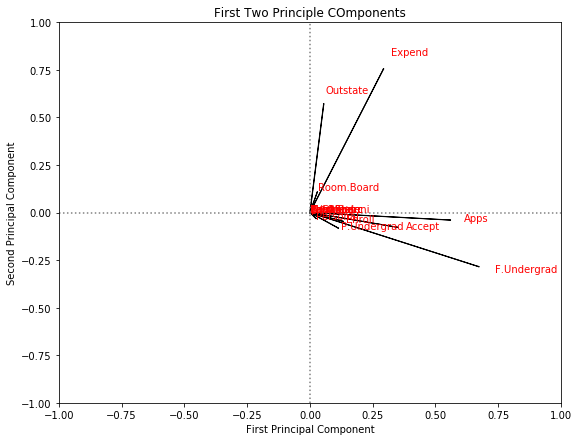

In [110]:

def plot_pca(pca_loadings, xmin, xmax, ymin, ymax,numV):
    
    fig , ax = plt.subplots(figsize=(9,7))

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Plot reference lines
    ax.hlines(0,xmin, xmax, linestyles='dotted', colors='grey')
    ax.vlines(0,ymin, ymax, linestyles='dotted', colors='grey')

    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')

    # Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
    a = 1.1
    for i in pca_loadings[['V1', 'V2']].index:
        ax.annotate(i, (pca_loadings.V1.loc[i]*a, pca_loadings.V2.loc[i]*a), color='red')

    # Plot vectors
    for i in range(numV):
        ax.arrow(0,0,pca_loadings.V1[i], pca_loadings.V2[i])
    ax.set_title('First Two Principle COmponents')
    return ax
plot_pca(pca_loadings, -1,1,-1,1,numV)

The first component seems to be mostly correlated with Apps, accept, enroll, and etc. It probably has something to do with applciation. The second component seemst obe mostly correlated with S.F ratio, perc.alumni, Grad.Rate, and etc. It probably has something to do with student outcome. 

## Problem 1 (2)

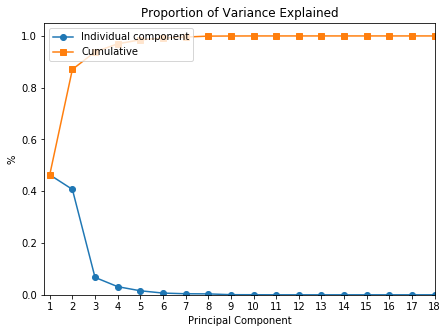

In [111]:
def plot_cum(pca,numV):    
    plt.figure(figsize=(7,5))

    plt.plot(list(range(1,numV+1)), pca.explained_variance_ratio_, '-o', label='Individual component')
    plt.plot(list(range(1,numV+1)), np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

    plt.title('Proportion of Variance Explained')
    plt.xlabel('Principal Component')
    plt.ylabel('%')
    plt.xlim(0.75,4.25)
    plt.ylim(0,1.05)
    plt.xticks(list(range(1,numV+1)))
    plt.legend(loc=2);
plot_cum(pca,numV)

In [7]:
print(f'The first two PCs explain {round(pca.explained_variance_ratio_[:2].sum()*100,2)}% of the variance.')

The first two PCs explain 58.42% of the variance.


## Problem 2(1)

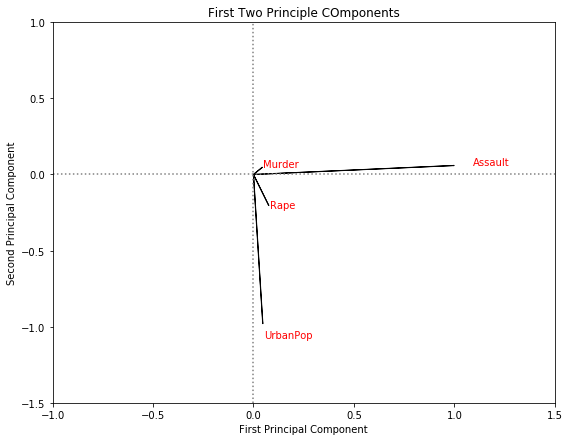

In [114]:


df2 = pd.read_csv('USArrests.csv', index_col=0)
X2 = pd.DataFrame(scale(df2), index=df2.index, columns=df2.columns)
column_names2 = [f'V{i}' for i in range(1, len(df2.columns)+1)]
PC_names = [f'PC{i}' for i in range(1, len(df2.columns)+1)]
numV2=len(df2.columns)


pca2 = PCA().fit(X2)
pca_loadings2 = pd.DataFrame(pca2.components_.T, index=df2.columns, columns=column_names2)
# pca_loadings

df_plot = pd.DataFrame(pca2.fit_transform(X2), columns=PC_names, index=X2.index)


pca2_full = PCA().fit(df2)
pca_loadings2_full = pd.DataFrame(pca2_full.components_.T, index=df2.columns, columns=column_names2)
df_plot_full = pd.DataFrame(pca2_full.fit_transform(df2), columns=PC_names, index=X2.index)
plot_pca(pca_loadings2_full,-1,1.5,-1.5,1,numV2)

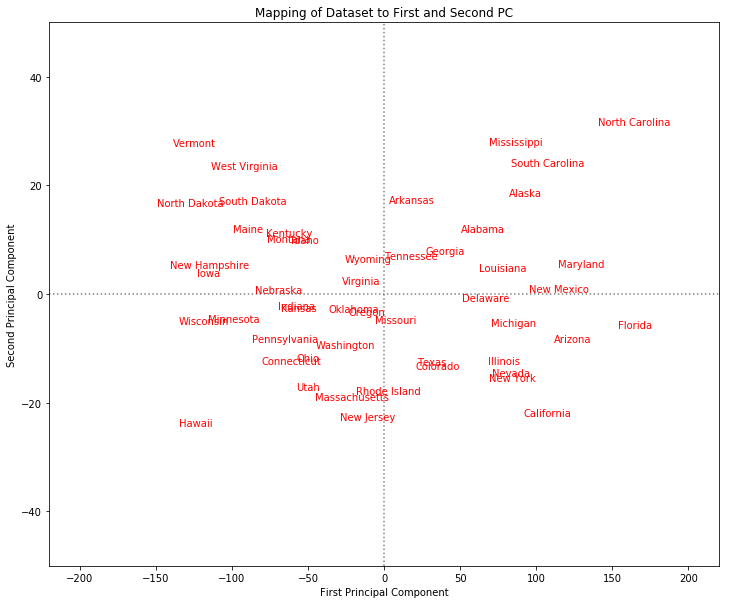

In [116]:

fig , ax1 = plt.subplots(figsize=(12,10))
xmin = -220
xmax = 220
ymin = -50
ymax = 50

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('Mapping of Dataset to First and Second PC')

# Plot reference lines
ax1.hlines(0,xmin, xmax, linestyles='dotted', colors='grey')
ax1.vlines(0,ymin, ymax, linestyles='dotted', colors='grey')

# Plot Principal Components 1 and 2
for i in df_plot_full.index:
    ax1.annotate(i, (df_plot_full.PC1.loc[i], df_plot_full.PC2.loc[i]), ha='center', color='r')


## Problem 2(2)~(4)


Here are the clustering results for when k=2:
The states in group 1 are Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming. 29 in total.
The states in group 2 are Alabama, Alaska, Arizona, Arkansas, California, Colorado, Delaware, Florida, Georgia, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina, Tennessee, Texas. 21 in total.

Here are the clustering results for when k=3:
The states in group 1 are Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin. 20 in total.
The states in group 2 are Arkansas, Colorado, Georgia, Massachuse

[None, None, None]

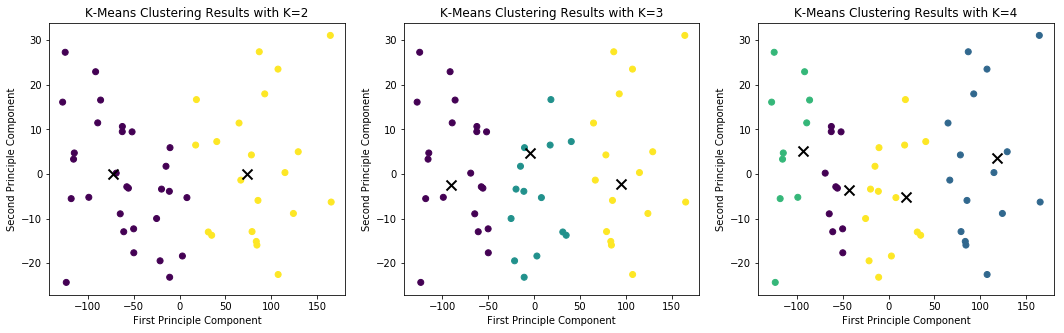

In [134]:
km2 = KMeans(n_clusters=2, n_init=20).fit(df2)
km3 = KMeans(n_clusters=3, n_init=20).fit(df2)
km4 = KMeans(n_clusters=4, n_init=20).fit(df2)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
# df_plot
[i.set_xlabel('First Principle Component') for i in [ax1, ax2, ax3]]
[i.set_ylabel('Second Principle Component') for i in [ax1, ax2, ax3]]
[k.set_title(f'K-Means Clustering Results with K={i+2}') for i,k in enumerate([ax1, ax2, ax3])]
temp = []
[temp.append(pca2_full.fit_transform(k.cluster_centers_)) for k in [km2, km3, km4]]
ax1.scatter(df_plot_full.PC1, df_plot_full.PC2, c=km2.labels_) 
# temp  = pca2_full.fit_transform(km2.cluster_centers_)
ax1.scatter(temp[0][:,0], temp[0][:,1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

ax2.scatter(df_plot_full.PC1, df_plot_full.PC2, c=km3.labels_) 
ax2.scatter(temp[1][:,0], temp[1][:,1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

ax3.scatter(df_plot_full.PC1, df_plot_full.PC2, c=km4.labels_) 
ax3.scatter(temp[2][:,0], temp[2][:,1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

def describe(n,labels):
    cat=pd.Series(labels, dtype="category")
    temp=pd.Series(df2.index).groupby(cat)
    print (f'\nHere are the clustering results for when k={n}:')
    for group, state in temp:
        print (f'The states in group {group+1} are {", ".join(list(state))}. {len(list(state))} in total.')

[describe(i+2,k) for i,k in enumerate([km2.labels_,km3.labels_,km4.labels_])]

## Problem 2 (5)

Text(0,0.5,'Second Principle Component')

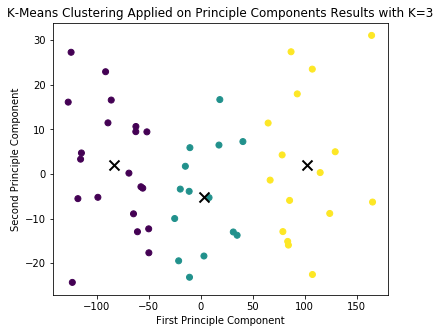

In [164]:
km3_pc = KMeans(n_clusters=3, n_init=20).fit(df_plot_full)

fig, ax = plt.subplots( figsize=(6,5))
# df_plot
ax.scatter(df_plot_full.PC1, df_plot_full.PC2, c=km3_pc.labels_) 
ax.set_title('K-Means Clustering Applied on Principle Components Results with K=3')
ax.scatter(km3_pc.cluster_centers_[:,0], km3_pc.cluster_centers_[:,1], marker='x', s=100, c='k', linewidth=2)
ax.set_xlabel('First Principle Component')
ax.set_ylabel('Second Principle Component')

In [165]:
# print(len(list(df2.index[km3.labels_ != km3_pc.labels_])))
d=df2.index[km3.labels_ != km3_pc.labels_]
if list(d):
    print(f'The centeroid positions are different. {", ".join(list(d))} now belong to different groups.')
else:
    print ('The centeroid positions are different. However, all data belong to the original group.')

The centeroid positions are different. However, all data belong to the original group.


## Problem 2 (6)~(7)

The states in group 1 are Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina. 16 in total.
The states in group 2 are Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming. 14 in total.
The states in group 3 are Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin. 20 in total.


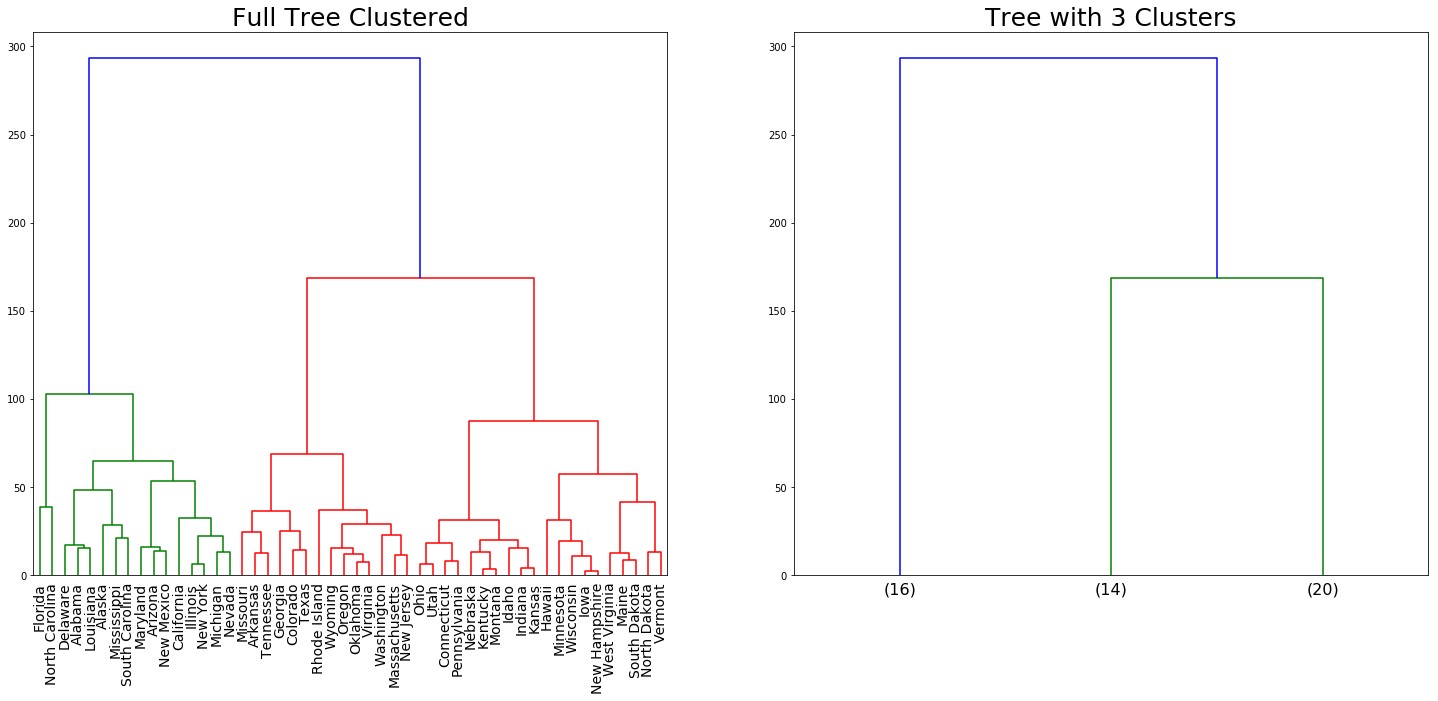

In [135]:
# Z = linkage(df2, method='complete')
## Here Euclidean distance is the default
Z = hr.complete (df2)
def plot_cluster(tree,n):
    fig,(ax1, ax2) = plt.subplots(1,2, figsize=(25, 10))
    cuttree = hr.fcluster(tree,n,criterion='maxclust')
    cuttree_cat=pd.Series(cuttree, dtype="category")
    temp=pd.Series(df2.index).groupby(cuttree_cat)
    dn = dendrogram(tree,labels=X2.index,  leaf_font_size=14, ax=ax1)
    dn2 = dendrogram(tree,truncate_mode='lastp', p=n, leaf_font_size=16, ax=ax2)
#     [i.set_ylabel('layer',fontsize = 25) for i in (ax1, ax2)]
    ax1.set_title('Full Tree Clustered',fontsize=25)
    ax2.set_title(f'Tree with {n} Clusters',fontsize=25)
    dic = dict()
    for group, state in temp:
        dic[group] = list(state)
        print (f'The states in group {group} are {", ".join(list(state))}. {len(list(state))} in total.')
    return dic
dic0=plot_cluster(Z,3)

## Problem 2 (8)

The states in group 1 are Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming. 31 in total.
The states in group 2 are Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas. 11 in total.
The states in group 3 are Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee. 8 in total.
------------------------------------------------------------------------------------------------------------
For group 1:
States North Dakota, Wyoming, Kentucky, Washington, New Jersey, Massachusetts, Nebraska, Oklahoma, South Dakota, Oregon, Wisconsin, Hawaii, New Hampshire, Virginia, Maine, Pennsylvania, Kansas, Connecticut, Minnesota, Montana, West Virginia

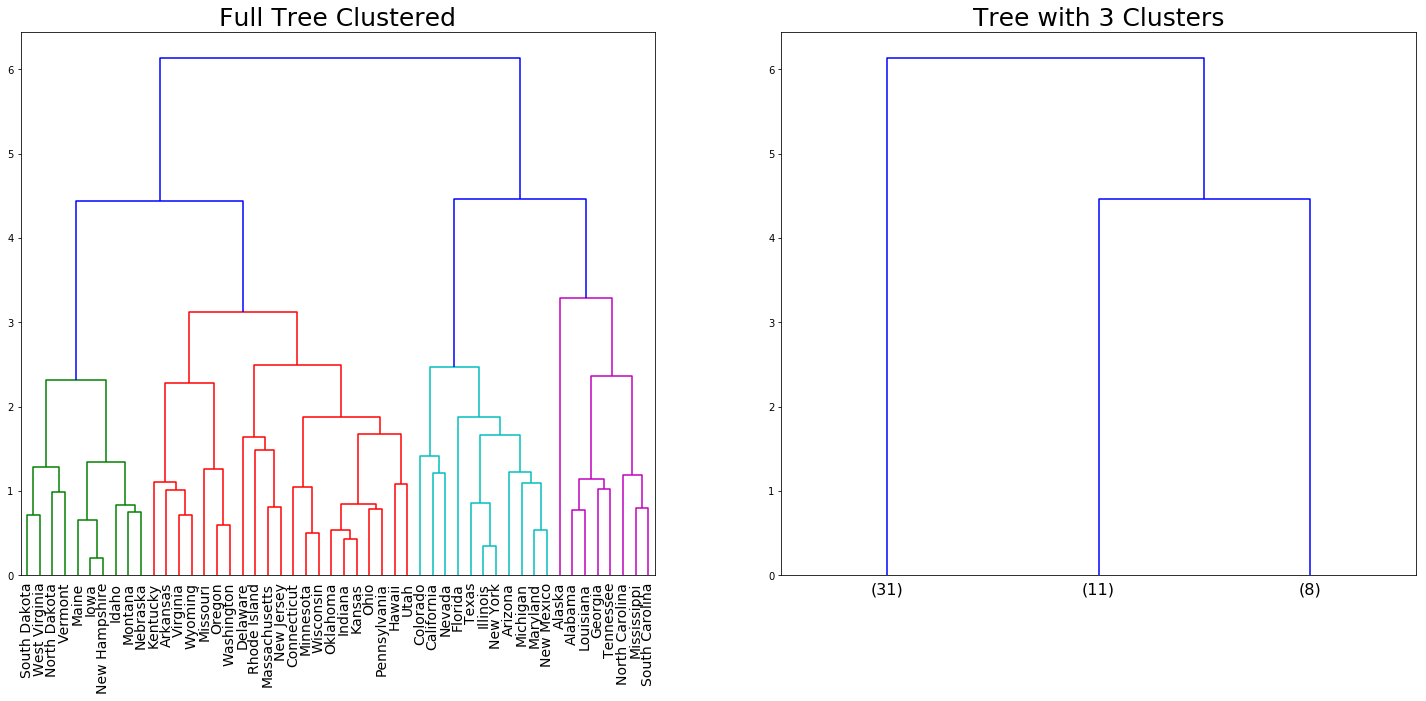

In [136]:
# print(X2)
Z2 = hr.complete (X2)
dic2 = plot_cluster(Z2,3)
print('------------------------------------------------------------------------------------------------------------')
for group in dic0:
#     print (group)
    a=dic0[group]
#     print (a)
    b=dic2[group]
    c=set(a+b)
#     print (c)
    diffa = c-set(a)
    diffb = c-set(b)
    print (f'For group {group}:')
    print(f'States {", ".join(list(diffa))} now belong to a different cluster.')
    print(f'States {", ".join(list(diffb))} are the new additions to group {group}.')
    print ('\n')
    

The resulting trees from normalized and un-normalized data are different but look structurally similar. The data should be sacled because the variables have different units. 